In [47]:
# Check if running on colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# pip install any missing packages
if IN_COLAB:
  !pip install equadratures # for standard pip install

# Persistence of equadratures objects

Persistence of `equadratures` objects might be desirable in many workflows, for example when saving a fitted `Poly` to make future predictions, or for record keeping. Starting in v9.1.0, `equadratures` can now be serialised with the `pickle` python standard library. 

## Serialisation
To serialise, use `pickle.dumps()`:

In [48]:
# Fit a simple 1D polynomial
import equadratures as eq
f = lambda x: (1.0 - 3*x[0])**2 + 100.0 
myparams = eq.Parameter(distribution='uniform', order=2, lower=-1.0, upper=1.0)
mybasis = eq.Basis('tensor-grid')
mypoly = eq.Poly(parameters=myparams, basis=mybasis, \
                 method='numerical-integration')
mypoly.set_model(f)

# Serialise
import pickle
serial = pickle.dumps(mypoly)

The serialised object can be unserialised with `pickle.loads()`:

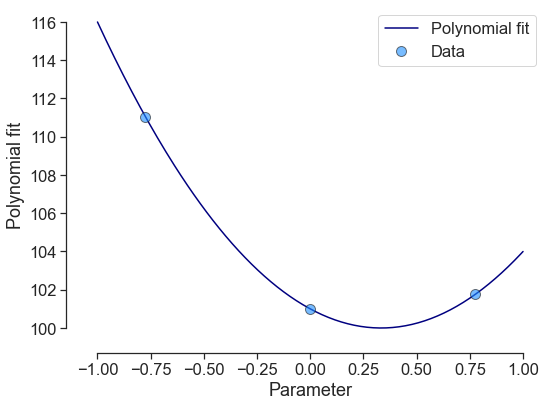

In [49]:
mypoly = pickle.loads(serial)
mypoly.plot_polyfit_1D(uncertainty=False)

## File storage
To save and load to and from files, `dumps` and `loads` can be replaced with `dump` and `load`. For example:

In [50]:
# Save to pickle file
with open('data/mypoly.pickle', 'wb') as f:
    pickle.dump(mypoly, f)

In [51]:
# Load from file
with open('data/mypoly.pickle','rb') as f:
    mypoly = pickle.load(f)
mypoly

For (potentially) better performance, `pickle.dump` and `pickle.load` can be replaced with the [joblib](https://joblib.readthedocs.io/en/latest/index.html) versions. However, `dumps` and `loads` versions are not avaiable in joblib.

<div class="alert alert-block alert-danger">
Never unpickle files from untrusted sources. This could lead to malicious code being excuted when the file is loaded.
</div>